In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from xgboost import XGBClassifier
# import xgboost
import math
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [99]:
import pandas as pd 

from google.colab import files
uploaded = files.upload()

Saving breast-cancer.data to breast-cancer (6).data


In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
bc = pd.read_csv('breast-cancer.data')
bc.columns = ['Class', 'Age', 'Menopause','TumorSize','Inv','Node',
           'DegMalig','Breast','BreastQuad','Irradiat']
bc.head()

,Class,Age,Menopause,TumorSize,Inv,Node,DegMalig,Breast,BreastQuad,Irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [102]:
#CONVERT VARIABLES TO MAKE USABLE 
bc[['StartAge', 'EndAge']] = bc.Age.str.split("-", expand = True)
bc[['StartTumor', 'EndTumor']] = bc.TumorSize.str.split("-", expand = True)
bc[['StartInv', 'EndInv']] = bc.Inv.str.split("-", expand = True)
bc.drop('Age',inplace=True, axis=1)
bc.drop('TumorSize',inplace=True, axis=1)
bc.drop('Inv',inplace=True, axis=1)
bc['Menopause'] = bc['Menopause'].astype('category')
bc['Node'] = bc['Node'].astype('category')
bc['Breast'] = bc['Breast'].astype('category')
bc['BreastQuad'] = bc['BreastQuad'].astype('category')
bc['Irradiat'] = bc['Irradiat'].astype('category')
bc['Class'] = bc['Class'].astype('category')
bc['Menopause'] = bc['Menopause'].cat.codes
bc['Node'] = bc['Node'].cat.codes
bc['Breast'] = bc['Breast'].cat.codes
bc['BreastQuad'] = bc['BreastQuad'].cat.codes
bc['Irradiat'] = bc['Irradiat'].cat.codes
bc['Class'] = bc['Class'].cat.codes
bc.head()

,Class,Menopause,Node,DegMalig,Breast,BreastQuad,Irradiat,StartAge,EndAge,StartTumor,EndTumor,StartInv,EndInv
0,0,2,1,2,1,5,0,40,49,20,24,0,2
1,0,2,1,2,0,2,0,40,49,20,24,0,2
2,0,0,1,2,1,3,0,60,69,15,19,0,2
3,0,2,1,2,1,4,0,40,49,0,4,0,2
4,0,0,1,2,0,2,0,60,69,15,19,0,2


In [103]:
bc.dropna(inplace = True)

In [104]:
#SPLIT THE DATA

X=bc.drop('Class', axis=1)
y=bc['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


Accuracy Score:  0.7017543859649122

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.43      0.40      0.41        15

    accuracy                           0.70        57
   macro avg       0.61      0.60      0.61        57
weighted avg       0.70      0.70      0.70        57

Matthew's Correlation Coefficient:  0.21434107811929168

Area Under the Curve 0.6047619047619047


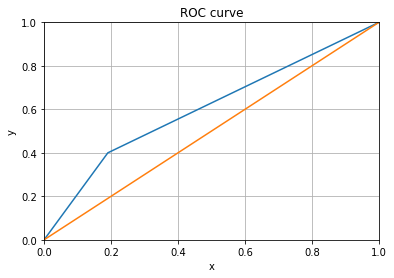

In [105]:
#LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(X_train,y_train)
hypothesis = regression.predict(X_test)

aScoreReg = metrics.accuracy_score(hypothesis,y_test)
print("")
print('Accuracy Score: ', aScoreReg)
print("")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,hypothesis))
print("Matthew's Correlation Coefficient: ", metrics.matthews_corrcoef(y_test, hypothesis))
print("")

fpr, tpr, thresholds = metrics.roc_curve(y_test, hypothesis)
print("Area Under the Curve {}" .format(metrics.roc_auc_score(y_test, hypothesis)))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

Accuracy Score:  0.631578947368421

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        42
           1       0.25      0.20      0.22        15

    accuracy                           0.63        57
   macro avg       0.49      0.49      0.49        57
weighted avg       0.61      0.63      0.62        57


Matthew's Correlation Coefficient:  -0.015430334996209192

Area Under the Curve: 0.4928571428571428


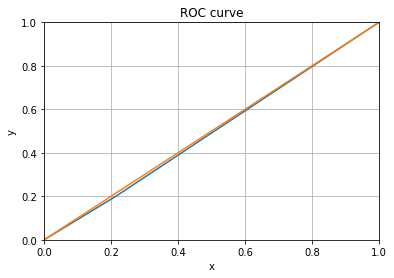

In [106]:
#NEAREST NEIGHBOR
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,matthews_corrcoef

kPredict=KNeighborsClassifier()
kPredict.fit(X_train,y_train)
yHypoth=kPredict.predict(X_test)

print('Accuracy Score: ',kPredict.score(X_test,y_test))
print("")
print(classification_report(y_test,yHypoth))
print("")
print("Matthew's Correlation Coefficient: ", metrics.matthews_corrcoef(y_test, yHypoth))
print("")
fpr, tpr, thresholds = metrics.roc_curve(y_test, yHypoth)
print("Area Under the Curve: {}" .format(metrics.roc_auc_score(y_test, yHypoth)))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

Accuracy Score:  0.7192982456140351

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.45      0.33      0.38        15

    accuracy                           0.72        57
   macro avg       0.62      0.60      0.60        57
weighted avg       0.70      0.72      0.70        57


Matthew's Correlation Coefficient:  0.2125375709969006

Area Under the Curve: 0.5952380952380952


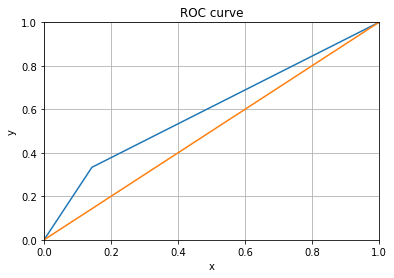

In [107]:
#RANDOM FOREST

model=RandomForestClassifier(n_estimators=500) #,max_depth=2, random_state=0)
model.fit(X_train, y_train)
prediction=model.predict(X_test)

aScoreForest = metrics.accuracy_score(prediction,y_test)
print('Accuracy Score: ', aScoreForest)
print("")
print(classification_report(y_test,prediction))
print("")
print("Matthew's Correlation Coefficient: ", metrics.matthews_corrcoef(y_test, prediction))
print("")
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
print("Area Under the Curve: {}" .format(metrics.roc_auc_score(y_test, prediction)))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

Accuracy Score:  0.7368421052631579

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        42
           1       0.00      0.00      0.00        15

    accuracy                           0.74        57
   macro avg       0.37      0.50      0.42        57
weighted avg       0.54      0.74      0.63        57


Matthew's Correlation Coefficient:  0.0

Area Under the Curve: 0.5


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


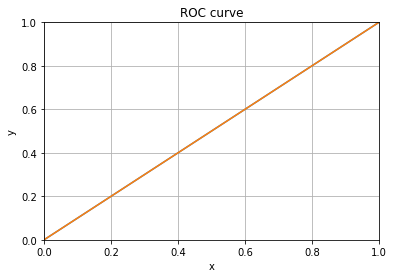

In [108]:
#SVM
ident = SVC()

ident.fit(X_train, y_train)
prediction2=ident.predict(X_test)

print("Accuracy Score: ",metrics.accuracy_score(prediction2,y_test))
print("")
print(classification_report(y_test,prediction2))
print("")
print("Matthew's Correlation Coefficient: ", metrics.matthews_corrcoef(y_test, prediction2))
print("")
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction2)
print("Area Under the Curve: {}" .format(metrics.roc_auc_score(y_test, prediction2)))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

accuracy score:  0.7719298245614035

Gaus score: 0.7263157894736842

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.56      0.67      0.61        15

    accuracy                           0.77        57
   macro avg       0.71      0.74      0.72        57
weighted avg       0.79      0.77      0.78        57


Matthew's Correlation Coefficient:  0.45110996830063893

Area Under the Curve: 0.738095238095238


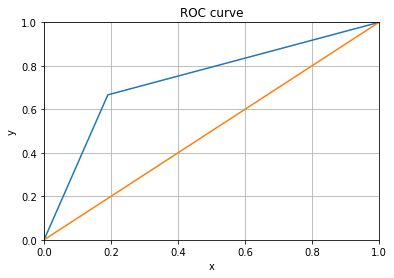

In [109]:
#NAIVE BAYES
gaus = GaussianNB()

gaus.fit(X_train, y_train)
prediction3=gaus.predict(X_test)
print("accuracy score: ", metrics.accuracy_score(prediction3,y_test))
print("")
print('Gaus score:',gaus.score(X,y))
print("")
print(classification_report(y_test,prediction3))
print("")
print("Matthew's Correlation Coefficient: ", metrics.matthews_corrcoef(y_test, prediction3))
print("")

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction3)
print("Area Under the Curve: {}" .format(metrics.roc_auc_score(y_test, prediction3)))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)